In [2]:
import pandas as pd
#URL = 'https://raw.githubusercontent.com/ece143team16/ECE143---Music-History-Analysis-of-Users/master/MLHD_demographics.csv'
demographics = pd.read_table('../Cleared Data/MLHD_demographics.csv',delimiter = '\t')
row,col = demographics.shape

demographics.head(10)


,age,country,gender
0,30.0,AT,n
1,35.0,US,m
2,35.0,UK,m
3,40.0,DK,n
4,NaN,SE,n
5,34.0,FR,m
6,NaN,NaN,n
7,NaN,DE,f
8,31.0,DE,m
9,32.0,UK,m


## Define function to get users of specific countries

In [3]:
demographics["country and gender"] = demographics["country"].map(str) + demographics["gender"]


def count_country_gender(users):
    '''
    :param count_country_gender: the country and gender of requested users, typed as 2-letter country code + 'f' or 'm'
                                    Ex: 'USm', 'USf', 'UKm', 'UKf'
    :type count_country_gender: string
    
    Remember that NA means NaN, not a country code!!
    
    '''
    
    return demographics['country and gender'].str.contains(users).sum()


In [4]:
m_US = count_country_gender('USm')
print 'US males:',m_US
f_US = count_country_gender('USf')
print 'US females:',f_US

m_UK = count_country_gender('UKm')
print 'UK males:',m_UK
f_UK = count_country_gender('UKf')
print 'UK females:',f_UK

m_BR = count_country_gender('BRm')
print 'BR males:',m_BR
f_BR = count_country_gender('BRf')
print 'BR females:',f_BR

m_DE = count_country_gender('DEm')
print 'German males:',m_DE
f_DE = count_country_gender('DEf')
print 'German females:',f_DE

m_NL = count_country_gender('NLm')
print 'Netherlands males:',m_NL
f_NL = count_country_gender('NLf')
print 'Netherlands females:',f_NL

US males: 63420
US females: 26820
UK males: 28920
UK females: 8606
BR males: 23119
BR females: 11040
German males: 24533
German females: 7623
Netherlands males: 10455
Netherlands females: 2923



## Produce graph of country demographics

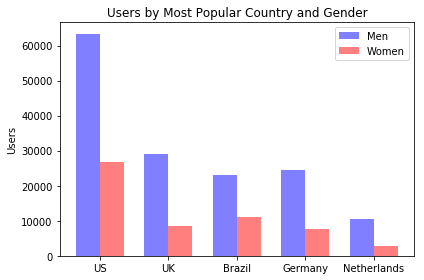

In [8]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 5

means_men = (m_US, m_UK, m_BR, m_DE, m_NL)

means_women = (f_US, f_UK, f_BR, f_DE, f_NL)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Women')

#plt.xlabel('Group')
plt.ylabel('Users')
plt.title('Users by Most Popular Country and Gender')
plt.xticks(index + bar_width / 2, ('US', 'UK', 'Brazil', 'Germany', 'Netherlands'))
plt.legend()

plt.tight_layout()
plt.show()

## Sort by age demographics

In [6]:
ranges = [20,25,30,40,50,60,150]
demographics.groupby(pd.cut(demographics["age"], ranges)).count()

#surprising number of 60+ having 1k more users. perhaps extra time in retirement?

,age,country,gender,country and gender
age,,,,
"(20, 25]",182456,174263,182456,182456
"(25, 30]",87752,84623,87752,87752
"(30, 40]",44556,43187,44556,44556
"(40, 50]",8813,8554,8813,8813
"(50, 60]",2173,2093,2173,2173
"(60, 150]",3060,2800,3060,3060


## Produce graph of age demographics

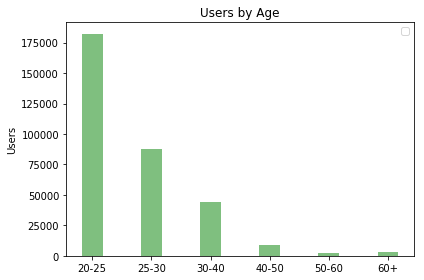

In [7]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 6

users = (182456,87752,44556, 8813, 2173, 3060)




index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, users, bar_width,
                 alpha=opacity,
                 color='g',
                 error_kw=error_config)



#plt.xlabel('Group')
plt.ylabel('Users')
plt.title('Users by Age')
plt.xticks(index, ('20-25','25-30', '30-40', '40-50', '50-60', '60+'))
plt.legend()

plt.tight_layout()
plt.show()